---
title: "Introduction to Artificial Neural Networks - Tensorflow"
author: "phonchi"
date: "04/24/2023"
format: 
  html:
    toc: true
    code-line-numbers: true
    code-tools: true
---

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math608/blob/master/static_files/presentations/08_neural_nets_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math608/blob/master/static_files/presentations/08_neural_nets_with_tensorflow.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br/>

## Setup

In [1]:
# Python ≥3.7 is recommended
import sys
assert sys.version_info >= (3, 7)
import os
from pathlib import Path
from time import strftime

# Scikit-Learn ≥1.01 is recommended
from packaging import version
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Tensorflow ≥2.8.0 is recommended
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
if "google.colab" in sys.modules:  # extra code
    %pip install -q -U tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 17.4 MB/s eta 0:00:00


In [3]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")

## Perceptrons

Let's use the iris dataset from openml. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

<center> <img src="https://drive.google.com/uc?id=1YdzLV9grRNMQaaDz7JHEhj_TbTzr9NDJ" alt="drawing" width="600"/> </center>

You can find more information about the dataset [here](https://api.openml.org/d/61).

In [4]:
iris = load_iris(as_frame=True)
print(iris.data.shape)
iris.data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


For simplicity, here we perform binary classification based on two features.

In [5]:
# Choose two features and setup a binary classification problem
X = iris.data[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = (iris.target == 0)  # Iris setosa

# Build Perceptron model
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

# Test on two new instances
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
y_pred

array([ True, False])

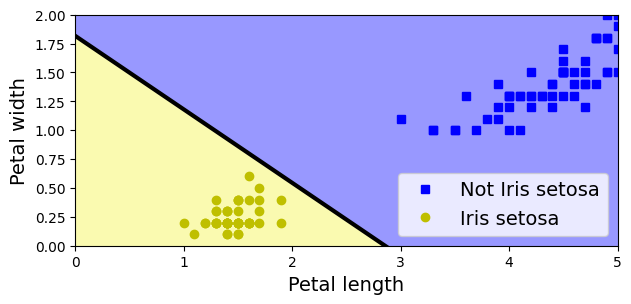

In [6]:
# Plot the decision boundary

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

## Tensorflow Playground



[http://playground.tensorflow.org/](http://playground.tensorflow.org/)

### Introduction 

The Playground provides mainly 6 different types of datasets.
1.   Classification: Circle, Exclusive or, Gaussian, spiral.
2.   Regression: Plane, Multi Gaussian.

Small circle points are represented as data points that correspond to Positive (+) and Negative (-). Positive represented by blue, Negative represented by orange. These same colours are used in representing Data, Neuron, Weight values.

The datasets all have 2 input features and 1 output label. The 2 input features, `X1` and `X2`, are represented by the coordinates. 

* The data points (represented by small circles) are initially colored orange or blue, which correspond to positive one and negative one.

* In the hidden layers, the lines are colored by the weights of the connections between neurons. Blue shows a positive weight, which means the network is using that output of the neuron as given. An orange line shows that the network is assiging a negative weight.

* In the output layer, the dots are colored orange or blue depending on their original values. The background color shows what the network is predicting for a particular area. **The intensity of the color shows how confident that prediction is**

### Try it

* **Layers and patterns**: try training the default neural network by clicking the "Run" button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns). In general, the more layers, the more complex the patterns can be.

* **Activation function**: try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster.

* **Local minima**: modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, just add and remove a neuron). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

* **Too small**: now remove one neuron to keep just 2. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

* **Large enough**: next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

* **Deep net and vanishing gradients**: now change the dataset to be the spiral  (bottom right dataset under "DATA"). Change the network architecture to have 4 hidden layers with 4 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the "vanishing gradients" problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.

## Building an Image Classifier Using the Sequential API

First let's import TensorFlow and Keras.

In [7]:
tf.__version__

'2.12.0'



<center> <img src="https://p3-juejin.byteimg.com/tos-cn-i-k3u1fbpfcp/cf69072577204457bcb409e686b11e28~tplv-k3u1fbpfcp-zoom-in-crop-mark:4536:0:0:0.awebp" alt="drawing" width="600"/> </center>

<div align="center"> source: https://juejin.cn/post/7096480975512666142 </div>

First, we need to load a dataset. We will tackle Fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of $28 \times 28$ pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST. **For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.**

You can find more built-in dataset [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

Let's start by loading the fashion MNIST dataset. `tf.Keras` has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() # use tf.keras not keras.io (multibackend keras)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels. Notice that the order of Tensorflow is `[batch, height, width, channel]`.

In [9]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. Now the validation set contains 5,000 images, and the test set contains 10,000 images. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

The labels are the class IDs (represented as `uint8`), from 0 to 9:

In [12]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a ankle boot:

In [14]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

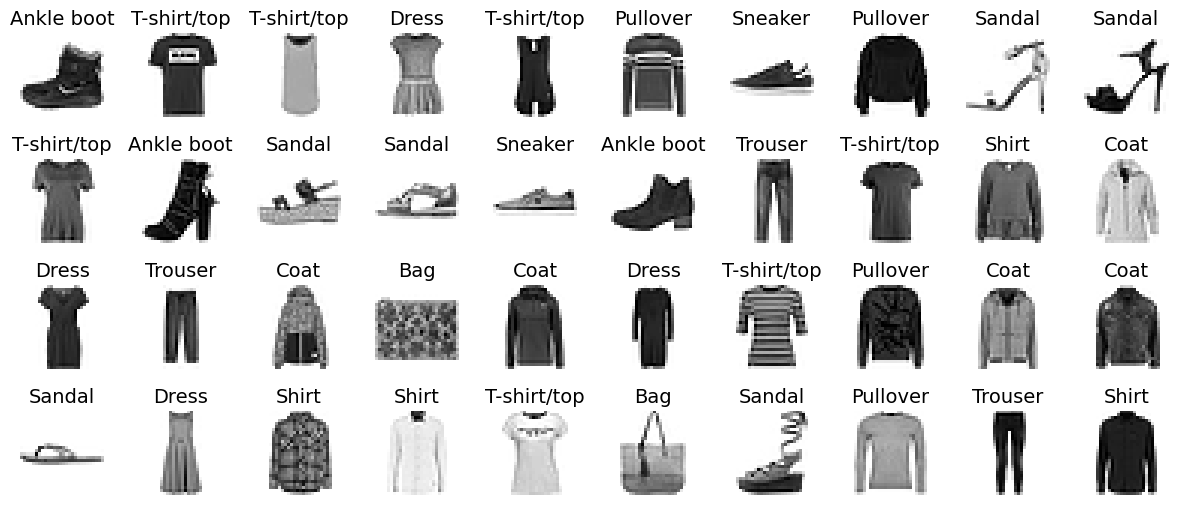

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the Model Using the Sequential API

Now let's build the neural network! Here is a classification MLP with two hidden layers:

In [16]:
# This is the simplest kind of Keras model, for neural networks that are just 
# composed of a single stack of layers, connected sequentially

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

* We build the first layer and add it to the model. It is a `Flatten` layer whose role is simply to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not have any parameters, it is just there to do some simple preprocessing. Since it is the first layer in the model, **you should specify the input_shape**: this does not include the batch size, only the shape of the instances. 
* Next we add a `Dense` hidden layer with 300 neurons. It will use the `ReLU` activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of weight bias terms (one per neuron in the next layer). 
* Next we add a second `Dense` hidden layer with 100 neurons, also using the `ReLU` activation function.
* Finally, we add a `Dense` output layer with 10 neurons (one per class), using the `softmax` activation function.

You can find different activation functions [here](https://keras.io/api/layers/activations/).

In [ ]:
[m for m in dir(tf.keras.activations) if not m.startswith("_")], [m for m in dir(tf.keras.layers) if "relu" in m.lower()]

In [17]:
# clear the session to reset the name counters
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# An alternative way to specify the sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

The model’s `summary()` method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense` layers often have a lot of parameters. For example, the first hidden layer has `784×300` connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data!

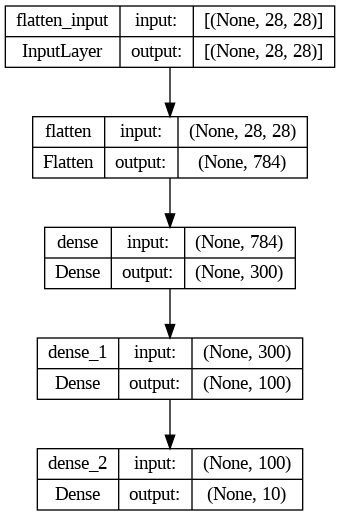

In [19]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense_1')

All the parameters of a layer can be accessed using its `get_weights()` and
`set_weights()` method. For a Dense layer, this includes both the connection weights and the bias terms:

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights, biases

(array([[-0.04090392,  0.05212015,  0.06563495, ..., -0.06813569,
         -0.07277503,  0.06356135],
        [-0.02273986, -0.03733981, -0.01904616, ...,  0.07051966,
         -0.03919001, -0.02506971],
        [ 0.06158407,  0.03164114,  0.04348575, ..., -0.07112216,
          0.047318  ,  0.01152001],
        ...,
        [-0.05140251, -0.0742506 ,  0.0284429 , ...,  0.04885727,
         -0.02155429, -0.05590397],
        [-0.07400953,  0.05923583, -0.02156794, ...,  0.03335793,
          0.01330438, -0.01484616],
        [-0.05129209, -0.01325566,  0.00971705, ...,  0.05628417,
         -0.04696462, -0.03978037]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights.shape, biases.shape

((784, 300), (300,))

Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry), and the biases were just initialized
to zeros, which is fine. If you ever want to use a different initialization method, you can set `kernel_initializer` (**kernel is another name for the matrix of connection weights**) or `bias_initializer` when creating the layer.

You can find more information [here](https://keras.io/initializers/).

In [26]:
[name for name in dir(tf.keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

### Compiling the Model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. 

First, we use the `"sparse_categorical_crossentropy"` loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. **If instead we had
one target probability per class for each instance**  (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to use the `"categorical_crossentropy"` loss instead. If we were doing binary classification, then we would use the `"sigmoid"` activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

In [27]:
#since this is a classifier, it’s useful to measure its "accuracy" during training

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

This is equivalent to:

```python
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
```

You can easily convert between one-hot vector and class ID.

In [28]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

### Training and Evaluating the Model

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features (`X_train`) and the target classes (`y_train`), as well as the number of epochs to train. We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch.

In [30]:
# Instead of passing a validation set using the validation_data
# argument, you could instead set validation_split to the ratio of
# the training set that you want Keras to use for validation (e.g., 0.1).
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 3ms/step - loss: 0.7154 - sparse_categorical_accuracy: 0.7646 - val_loss: 0.4979 - val_sparse_categorical_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4833 - sparse_categorical_accuracy: 0.8307 - val_loss: 0.4622 - val_sparse_categorical_accuracy: 0.8326
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.8464 - val_loss: 0.4222 - val_sparse_categorical_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.8573 - val_loss: 0.3931 - val_sparse_categorical_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3761 - spar

The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly **a dictionary** (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

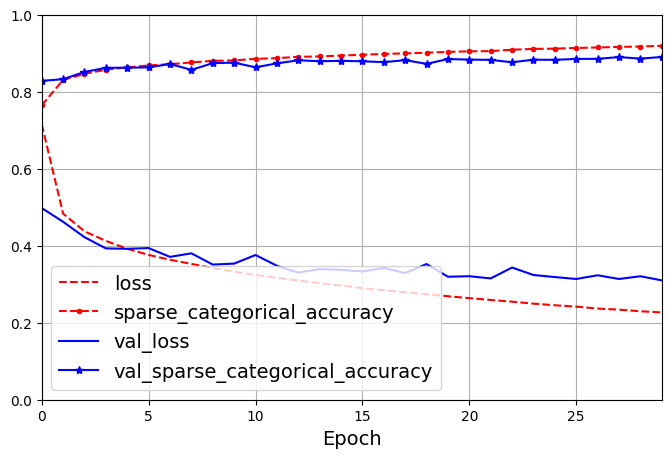

In [33]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the `fit()` method again, **since Keras just continues training
where it left off**.

Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the `evaluate()` method.

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3226 - sparse_categorical_accuracy: 0.8860


[0.32261887192726135, 0.8859999775886536]

**It is common to get slightly lower performance on the test set
than on the validation set, because the hyperparameters are tuned on the validation set**, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck).

### Using the Model to Make Predictions

Next, we can use the model’s `predict()` method to make predictions on new instances. We will just use the first 3 instances of the test set:

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 113ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 95%, the probability of class 7 (sneaker) is 4%, and the other classes are negligible. In other words, it “believes” it’s footwear, probably ankle boots, but it’s not entirely sure, it might be sneakers instead. If you only care about the class with the highest estimated probability then you can use the following code:

In [36]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3] # The classifier actually classified all three images correctly
y_new

array([9, 2, 1], dtype=uint8)

### Try different network architecture and hyperparameters

In [39]:
# Sometimes applying BN before the activation function works better (there's a debate on this topic)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer=tf.keras.initializers.HeNormal),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("swish"),
    tf.keras.layers.Dropout(rate=0.3),    
    tf.keras.layers.Dense(100, kernel_initializer=tf.keras.initializers.HeNormal),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("swish"),
    tf.keras.layers.Dropout(rate=0.3),    
    tf.keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                      

In [41]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 30
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5526 - accuracy: 0.8029 - val_loss: 0.4146 - val_accuracy: 0.8486 - lr: 0.0500
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4318 - accuracy: 0.8441 - val_loss: 0.3784 - val_accuracy: 0.8612 - lr: 0.0500
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3955 - accuracy: 0.8555 - val_loss: 0.3812 - val_accuracy: 0.8642 - lr: 0.0500
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3691 - accuracy: 0.8660 - val_loss: 0.3280 - val_accuracy: 0.8766 - lr: 0.0500
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3551 - accuracy: 0.8705 - val_loss: 0.3447 - val_accuracy: 0.8682 - lr: 0.0500
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3398 - accuracy: 0.8754 - val_loss: 0.3373 - val_accuracy: 0.8742 - lr: 0.0500
Epoch 7/30
1719/1719 [==============================] - 

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
# Perform MC Dropout 
y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in our first lecture. This dataset is simpler than the one we used, since it contains only numerical features (there is no `ocean_proximity` feature, and there is no missing value.):

[https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
housing.data.shape, housing.target

In [ ]:
pd.DataFrame(housing.data, columns=housing.feature_names)

Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

In [ ]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
rmse_test, y_pred

## Building Complex Models Using the Functional API (Optional)

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer. **This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path).** In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.


<center> <img src="https://drive.google.com/uc?id=1YfeBGcsHyReUuHokxltk8tQNWjV7L1cG" alt="drawing" width="400"/> </center>

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

* First, we need to create an `Input` object. This is needed because we may have
multiple inputs, as we will see later.
* Next, we create a `Dense` layer with 30 neurons and using the `ReLU` activation function. As soon as it is created, **notice that we call it like a function**, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together, no actual data is being processed yet.
* We create a `Concatenate()` layer, and once again we immediately use it like a function, to **concatenate the input layer and the output of the second hidden layer**.
* Lastly, we create a Keras Model, specifying which inputs and outputs to use.

> The Normalization layer learns the feature means and standard deviations in the training data when you call the `adapt()` method. Yet when you display the model’s summary, these statistics are listed as non-trainable. This is because these parameters are not affected by gradient descent.

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train) # Normalize the input

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

In [ ]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
rmse_test, y_pred

But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7).

<center> <img src="https://drive.google.com/uc?id=1YhJ-16zGDG0GkdDeZUJWi5FJAfPHQJvs" alt="drawing" width="400"/> </center>




In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

On the other hand, there are also many use cases in which you may want to **have multiple outputs**:
1. The task may demand it, for example you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
2. Similarly, you may have multiple independent tasks to perform based on the same data. Sure, you could train one neural network per task, but in many cases
you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can **learn features in the data that are useful across tasks**. For instance, you may want to build a multitask classification on pictures of facesm using one out put to classify the facial expression while another to identify whether they are wearing glasses or not.
3. Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of thenetwork. Adding an auxiliary output for regularization:

The network we would like to build is thus like the following figure:

<center> <img src="https://drive.google.com/uc?id=1YiqI9s6oXEfV5P5GXXZjzSMOea4rqU8D" alt="drawing" width="400"/> </center>

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Each output will need its own loss function, so when we compile the model we should pass a list of losses. By default, `Keras` will compute all these losses and simply add them up to get the final loss used for training. However, we care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

Now when we train the model, we need to provide some labels for each output. In
this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we just need to pass `(y_train, y_train)` (and the same goes for `y_valid` and `y_test`):

In [ ]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

## Building Dynamic Models Using the Subclassing API (Optional)

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative
programming style, the `Subclassing` API is for you.

Simply subclass the `Model` class, create the layers you need in the constructor, and use them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the Functional API.

In [ ]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

This example looks very much like the Functional API, except we do not need to create the inputs, we just use the input argument to the `call()` method, and **we separate the creation of the layers in the constructor from their usage in the `call()` method.** However, the big difference is that **you can do pretty much anything you want in the `call()` method: for loops, if statements, low-level TensorFlow operations! This makes it a great API for researchers experimenting with new ideas.**

However, this extra flexibility comes at a cost: your model’s architecture is hidden within the `call()` method, so Keras cannot easily inspect it, it cannot save or clone it, and when you call the `summary()` method, you only get a list of layers, without any information on how they are connected to each other.Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes!

In [ ]:
input_shape=[(None, 5), (None, 6)]
model.build(input_shape) # We have to tell keras the input shape to count the number of parameters
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [ ]:
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

## Saving and Restoring

When you set `save_format="tf"`, `Keras` saves the model using `TensorFlow`’s Saved‐Model format: this is a directory (with the given name) containing several files and subdirectories. In particular, the `saved_model.pb` file contains the model’s architecture and logic in the form of a serialized computation graph, so you don’t need to deploy the model’s source code in order to use it in production; the `SavedModel` is sufficient. The `keras_metadata.pb` file contains extra information needed by `Keras`. The variables subdirectory contains all the parameter values (including the connection weights, the biases, the normalization statistics, and the optimizer’s parameters), possibly split across multiple files if the model is very large. Lastly, the assets directory may contain extra files, such as data samples, feature names, class names, and so on. By default, the assets directory is empty. Since the optimizer is also saved, including its hyperparameters and any state it may have, after loading the model you can continue training if you want.

> If you set `save_format="h5"` or use a filename that ends with .h5, .hdf5, or .keras, then Keras will save the model to a single file using a Keras-specific format based on the HDF5 format. However, most TensorFlow deployment tools require the `SavedModel` format instead.

In [ ]:
model.save("my_keras_model", save_format="tf")

In [ ]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

You can then load the model using `tf.keras.models.load_model()`:

In [ ]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

You can also use `save_weights()` and `load_weights()` to save and load only the
parameter values. This includes the connection weights, biases, preprocessing stats, optimizer state, etc. The parameter values are saved in one or more files such as `my_weights.data-00004-of-00052`, plus an index file like `my_weights.index`.

In [ ]:
model.save_weights("my_weights")

In [ ]:
model.load_weights("my_weights") # Note that you have to get the model before loading weights here

In [ ]:
for path in sorted(Path().glob("my_weights.*")):
    print(path)

## Using Callbacks during Training

But what if training lasts several hours? In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training. The `fit()` method accepts a callbacks argument that lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

[https://keras.io/callbacks/](https://keras.io/callbacks/)

In [ ]:
# if you use a validation set during training, you can set
# save_best_only=True when creating the ModelCheckpoint. In this case, it will only
# save your model when its performance on the validation set is the best so far.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_best_only=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will optionally roll back to the best model. **You can combine both callbacks to both save checkpoints of your model** (in case your computer crashes), and actually interrupt training early when there is no more progress (to avoid wasting time and resources):

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

The number of epochs can be set to a large value since training will stop automatically when there is no more progress (just make sure the learning rate is not too small, or else it might keep making slow progress until the end). The `EarlyStopping` callback will store the weights of the best model in RAM, and it will restore them for you at the end of training.

If you need extra control, you can easily write your own custom callbacks. For
example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0) # Note that we use verbose=0 here

## TensorBoard

Now let’s take a look at one more tool you should definitely have in your toolbox when using `tf.keras`: TensorBoard. TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by
your model, and more! 

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called **event files**. Each binary data record is called a *summary*. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. 

In general, you want to point the TensorBoard server to a root log directory, and configure your program so that it writes to a different subdirectory every time it runs. So let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time, so that it is different at every run.

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

In [ ]:
# builds the first regression model we used earlier

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

In [ ]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Check out the other available logging options:

[https://www.tensorflow.org/tensorboard/get_started](https://www.tensorflow.org/tensorboard/get_started)

## References

1. [https://github.com/ageron/handson-ml3/](https://github.com/ageron/handson-ml3/)